**Molecular Dynamics simulation routine:**

this is some text that explains stuff you do.

* Import external libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import copy
import numpy as np
import scipy as scy

* Creating a particle class:

In [2]:
class Particle:
    def __init__(self, r, x, y, vx, vy):
        self.r = r
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def __repr__(self):
        return str("This is a particle at %0.2f, %0.2f with v=%0.2f,%0.2f" % (self.x,self.y,self.vx,self.vy))

* Defining the box:

In [3]:
box_size_x = 20
box_size_y = 20

box = [box_size_x,box_size_y]

number_of_particles = 50

vel = np.ones(number_of_particles)*0.5
angles = np.random.uniform(0,2*np.pi,number_of_particles)

x_rand = np.random.randint(1,box[0]-1,number_of_particles)
y_rand = np.random.randint(1,box[1]-1,number_of_particles)

particles = []
for i in range(number_of_particles):
    particles.append(Particle(0.5,x_rand[i],y_rand[i],np.sin(angles[i])*vel[i],np.cos(angles[i])*vel[i]))



* Defining simulation step numbers

In [8]:
steps = 1000

* initialize trajectory:

In [9]:
data_traj = np.zeros((number_of_particles,4,steps))

(50, 4, 1000)

* define time integrator for numerical, stepwise solution of equation of motion with a discrete time step $dt$:

In [11]:
def move_unbound(p,dt):
    p.x = np.mod(p.x + p.vx*dt,box_size_x)
    p.y = np.mod(p.y + p.vy*dt,box_size_y)
    return p

In [13]:
# https://hermann-baum.de/elastischer_stoss/
def collide_simple(particles):
    for i in range(len(particles)):
        for j in range(len(particles)):
            if i < j:
                distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                if distance<(particles[i].r+particles[j].r):
                    # angle between x-axis and line between particles
                    phi = np.arctan((particles[j].y - particles[i].y)/(particles[j].x - particles[i].x))
                    # change the velocities
                    sin_phi = np.sin(phi)
                    cos_phi = np.cos(phi)

                    # Get the velocities of particles i and j
                    v1x, v1y = particles[i].vx, particles[i].vy
                    v2x, v2y = particles[j].vx, particles[j].vy

                    # Calculate the updated velocities using the provided formulas
                    new_v1x = (v1x * sin_phi - v1y * cos_phi) * sin_phi + (v2x * cos_phi + v2y * sin_phi) * cos_phi
                    new_v1y = (-v1x * sin_phi + v1y * cos_phi) * cos_phi + (v2x * cos_phi + v2y * sin_phi) * sin_phi
                    new_v2x = (v2x * sin_phi - v2y * cos_phi) * sin_phi + (v1x * cos_phi + v1y * sin_phi) * cos_phi
                    new_v2y = (-v2x * sin_phi + v2y * cos_phi) * cos_phi + (v1x * cos_phi + v1y * sin_phi) * sin_phi

                    # Update the particles' velocities
                    particles[i].vx, particles[i].vy = new_v1x, new_v1y
                    particles[j].vx, particles[j].vy = new_v2x, new_v2y
                    #print(particles[i],particles[j],'collided with a distance of ', distance)


In [16]:
'''particles[0].x = 5
particles[0].y = 10
particles[0].vx = 0.4
particles[0].vy = 0

particles[1].x = 15
particles[1].y = 10
particles[1].vx = -0.4
particles[1].vy = 0'''

'particles[0].x = 5\nparticles[0].y = 10\nparticles[0].vx = 0.4\nparticles[0].vy = 0\n\nparticles[1].x = 15\nparticles[1].y = 10\nparticles[1].vx = -0.4\nparticles[1].vy = 0'

* carry out simulation:

In [17]:
for i in range(steps):
    for j in range(number_of_particles):
        #move(p1,1)
        #reflect(p1)
        move_unbound(particles[j],1)
    collide_boundary(particles,i)
    for j in range(number_of_particles):
        data_traj[j,:,i] = [particles[j].x, particles[j].y, particles[j].vx, particles[j].vy]
        

0
This is a particle at 11.49, 0.88 with v=0.49,-0.12 This is a particle at 10.68, 0.62 with v=-0.32,-0.38 collided with a distance of  0.8500980232682652
0.14990197673173478 0.31992044663547425 0.9492604399069478 0.3144910447495573
-0.1422960163752876 -0.047142829272387096
This is a particle at 11.56, 0.91 with v=-0.32,-0.38 This is a particle at 10.61, 0.59 with v=0.49,-0.12 collided with a distance of  0.9999999999999993
0
This is a particle at 2.43, 7.74 with v=0.43,-0.26 This is a particle at 1.83, 7.47 with v=-0.17,0.47 collided with a distance of  0.6540173295183807
0.34598267048161935 0.42778821593978494 0.9098855537949139 0.4148593484487519
-0.3148046337346114 -0.14353414525056382
This is a particle at 2.59, 7.81 with v=0.21,-0.36 This is a particle at 1.68, 7.40 with v=0.05,0.57 collided with a distance of  1.0
0
This is a particle at 7.02, 9.50 with v=0.02,0.50 This is a particle at 7.22, 10.45 with v=0.22,0.45 collided with a distance of  0.9711780898103328
0.02882191018966

In [137]:
#data_traj

* Plotting trajectory with Matplotlib:

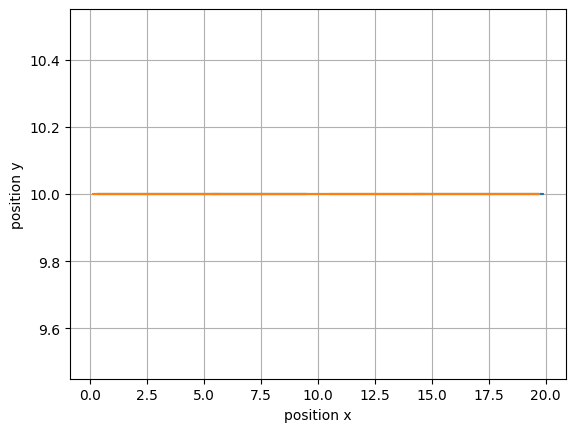

In [138]:
for data_traj_j in data_traj:
    plt.plot(data_traj_j[0],data_traj_j[1],'-')
plt.xlabel('position x')
plt.ylabel('position y')

plt.grid()
plt.show()

**Animate trajectory:**

* Set up the figure, the axis, and the plot element we want to animate

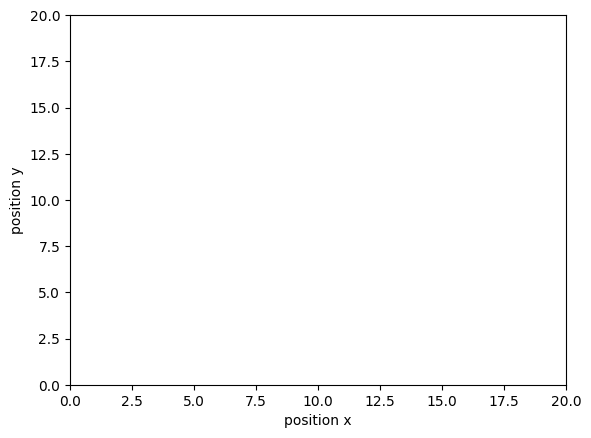

In [139]:
fig, ax = plt.subplots()

ax.set_xlim((0, box[0]))
ax.set_ylim((0, box[1]))

plt.xlabel('position x')
plt.ylabel('position y')

dot, = ax.plot([], [], 'bo', ms=5.0)


* initialization function: plot the background of each frame

In [140]:
def init():
    dot.set_data([], [])
    return (dot,)

In [141]:
data_traj[:,0,1]

array([ 5.8, 14.2])

* animation function. This is called sequentially

In [142]:
def animate(i):
    x = data_traj[:,0,i]
    y = data_traj[:,1,i]
    dot.set_data(x, y)
    return (dot,)

* call the animator. blit=True means only re-draw the parts that have changed.

In [143]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=steps, interval=60, blit=True)

In [144]:
HTML(anim.to_html5_video())

**Histogramming:**

KeyboardInterrupt: 

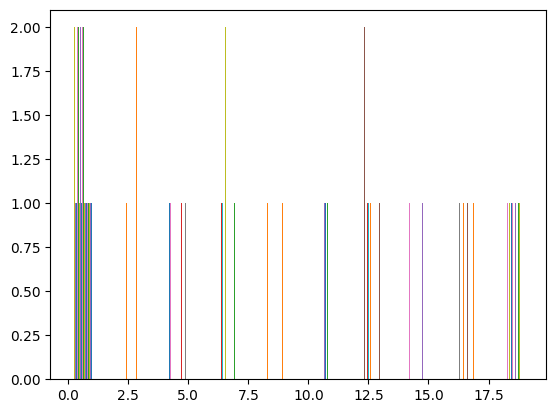

In [173]:
plt.hist(data_traj[0],range=(0,box[0]),bins=10)
plt.xlabel('position x')
plt.ylabel('occupancy')
plt.show()

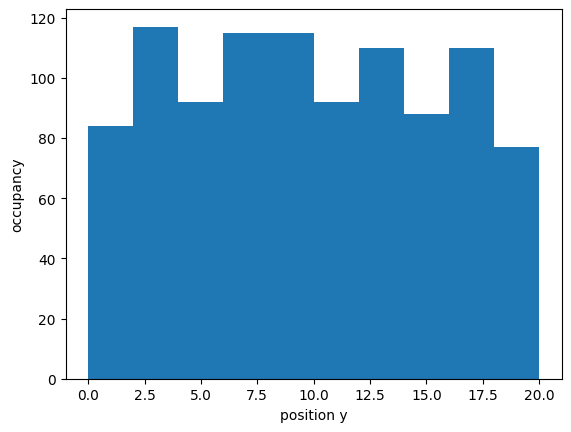

In [22]:
plt.hist(data_traj[1],range=(0,box[1]),bins=10)
plt.xlabel('position y')
plt.ylabel('occupancy')
plt.show()

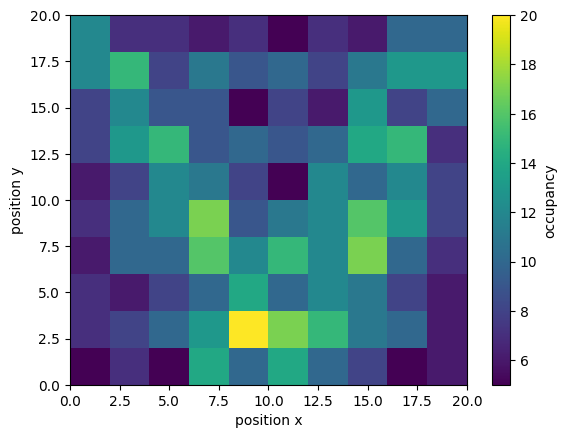

In [23]:
plt.hist2d(data_traj[0], data_traj[1], range=[[0,box[0]],[0,box[1]]], bins=10)
plt.xlabel('position x')
plt.ylabel('position y')
plt.colorbar().set_label('occupancy')
plt.show()

**Interpretation:**
* in the reduced data projection, the occupancy of each bin seems even and well-distributed
* in the full dimensional projection, it can be seen easily that the box is **not** fully sampled, large undersampled patches present
* *data dimensionality reduction always brings the danger of wrong projection!*

**Solution for improvements:**
* enhance sampling by
    * prolong the simulation
    * increase the time step
* *Caveat: all solutions come with problems like increased computational cost or sampling errors!*